In [2]:
import pandas as pd

data = pd.read_csv('model_data_compress.csv')
data

,project,bug,regex_file_matching,description_matching,java_search_match,dot_words_match,class_and_method_match,elastic_full,elastic_method,elastic_pfad,loc,elastic_similarReports_content,elastic_similarReports_fullSearch,versionHistory,brTracer,Result
0,Apache_CAMEL_CAMEL_1_6_0,81,0.0,1.0,2.0,0.0,0.0,0.479904,0.000000,0.0,0.033719,0.000000,0.000000,0.0,0.100994,0
1,Apache_CAMEL_CAMEL_1_6_0,81,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.102164,0.000503,0.000503,0.0,0.000000,0
2,Apache_CAMEL_CAMEL_1_6_0,81,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.268747,0.001007,0.001007,0.0,0.006797,0
3,Apache_CAMEL_CAMEL_1_6_0,81,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.068445,0.001510,0.001510,0.0,0.000000,0
4,Apache_CAMEL_CAMEL_1_6_0,81,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.543030,0.002013,0.002013,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33998314,Wildfly_WFMP_WFMP_1_1_0,58,0.0,0.0,1.0,0.0,0.0,0.237851,0.000000,0.0,0.762500,0.937500,0.937500,0.0,0.225155,0
33998315,Wildfly_WFMP_WFMP_1_1_0,58,0.0,0.0,1.0,0.0,0.0,0.168598,0.000000,0.0,0.750000,0.950000,0.950000,0.0,0.269341,0
33998316,Wildfly_WFMP_WFMP_1_1_0,58,0.0,0.0,0.0,0.0,0.0,0.035214,0.000000,0.0,0.225000,0.962500,0.962500,0.0,0.001466,0
33998317,Wildfly_WFMP_WFMP_1_1_0,58,0.0,1.0,0.0,0.0,0.0,0.000169,0.000000,0.0,0.275000,0.975000,0.975000,0.0,0.125162,0


In [2]:
projects = data.project.unique()
projectVersionMap = {}
for project in projects:
    projectParts = project.split("_")
    groupName = projectParts[0] + "_" + projectParts[1]
    if groupName not in projectVersionMap:
        projectVersionMap[groupName] = []
    projectVersionMap[groupName].append(project)

projectVersionMap

{'Apache_CAMEL': ['Apache_CAMEL_CAMEL_1_6_0',
  'Apache_CAMEL_CAMEL_1_6_1',
  'Apache_CAMEL_CAMEL_1_6_2',
  'Apache_CAMEL_CAMEL_1_6_3',
  'Apache_CAMEL_CAMEL_1_6_4',
  'Apache_CAMEL_CAMEL_2_0_0',
  'Apache_CAMEL_CAMEL_2_10_0',
  'Apache_CAMEL_CAMEL_2_10_4',
  'Apache_CAMEL_CAMEL_2_10_6',
  'Apache_CAMEL_CAMEL_2_10_7',
  'Apache_CAMEL_CAMEL_2_11_0',
  'Apache_CAMEL_CAMEL_2_11_1',
  'Apache_CAMEL_CAMEL_2_11_2',
  'Apache_CAMEL_CAMEL_2_11_3',
  'Apache_CAMEL_CAMEL_2_11_4',
  'Apache_CAMEL_CAMEL_2_12_0',
  'Apache_CAMEL_CAMEL_2_12_1',
  'Apache_CAMEL_CAMEL_2_12_2',
  'Apache_CAMEL_CAMEL_2_12_3',
  'Apache_CAMEL_CAMEL_2_12_4',
  'Apache_CAMEL_CAMEL_2_12_5',
  'Apache_CAMEL_CAMEL_2_13_0',
  'Apache_CAMEL_CAMEL_2_13_1',
  'Apache_CAMEL_CAMEL_2_13_2',
  'Apache_CAMEL_CAMEL_2_13_3',
  'Apache_CAMEL_CAMEL_2_13_4',
  'Apache_CAMEL_CAMEL_2_14_0',
  'Apache_CAMEL_CAMEL_2_14_1',
  'Apache_CAMEL_CAMEL_2_14_2',
  'Apache_CAMEL_CAMEL_2_14_3',
  'Apache_CAMEL_CAMEL_2_15_0',
  'Apache_CAMEL_CAMEL_2_15_1'

In [3]:
rows_list = []

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import pickle

num_trees=1000
params = {
  'num_parallel_tree': num_trees,
}
start_at = 'Apache_HIVE'
found = False
for key in projectVersionMap:
    if start_at == key:
        found = True    
    if not found:
        continue
    
    print("Build Model " + key)
    train = pd.read_csv('data/' + key + '_train.csv')
    columns = train.drop(['Unnamed: 0','project','bug','Result','description_matching'], axis=1).columns
    print(columns)
    matrix = xgb.DMatrix(train[columns], label=train['Result'])
    
    gbm = xgb.train(params,matrix, num_boost_round=1)
    e = gbm.get_score(importance_type='gain')
    rows_list.append(e)
    print(gbm.feature_names)
    gbm.save_model('model/' + key + '.json')
    pickle.dump(gbm, open('model/' + key + '.pickle.dat', "wb"))
 
    


Build Model Apache_HIVE
Index(['regex_file_matching', 'java_search_match', 'dot_words_match',
       'class_and_method_match', 'elastic_full', 'elastic_method',
       'elastic_pfad', 'loc', 'elastic_similarReports_content',
       'elastic_similarReports_fullSearch', 'versionHistory', 'brTracer'],
      dtype='object')
['regex_file_matching', 'java_search_match', 'dot_words_match', 'class_and_method_match', 'elastic_full', 'elastic_method', 'elastic_pfad', 'loc', 'elastic_similarReports_content', 'elastic_similarReports_fullSearch', 'versionHistory', 'brTracer']
Build Model Commons_CODEC
Index(['regex_file_matching', 'java_search_match', 'dot_words_match',
       'class_and_method_match', 'elastic_full', 'elastic_method',
       'elastic_pfad', 'loc', 'elastic_similarReports_content',
       'elastic_similarReports_fullSearch', 'versionHistory', 'brTracer'],
      dtype='object')


In [4]:
df = pd.DataFrame(rows_list)
df

['regex_file_matching',
 'java_search_match',
 'dot_words_match',
 'class_and_method_match',
 'elastic_full',
 'elastic_method',
 'elastic_pfad',
 'loc',
 'elastic_similarReports_content',
 'elastic_similarReports_fullSearch',
 'versionHistory',
 'brTracer']

In [5]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import pickle

num_trees=1000
params = {
  'num_parallel_tree': num_trees,
}

train = pd.read_csv('data/Spring_SWF_train.csv')
columns = train.drop(['Unnamed: 0','project','bug','Result','description_matching'], axis=1).columns
matrix = xgb.DMatrix(train[columns], label=train['Result'])
gbm = xgb.train(params,matrix, num_boost_round=1)
gbm.save_model('model/smartshark2.json')
pickle.dump(gbm, open('model/smartshark2.pickle.dat', "wb"))

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb

gbm = xgb.Booster(model_file='model/smartshark3.model')

In [12]:
gbm.get_score()

{'f0': 10748,
 'f1': 248,
 'f10': 9204,
 'f13': 5403,
 'f2': 1621,
 'f3': 6829,
 'f5': 3387,
 'f6': 6064,
 'f7': 2306,
 'f8': 3480,
 'f9': 6662}

In [10]:
gbm.get_fscore()

{'f9': 4610,
 'f0': 6388,
 'f8': 2221,
 'f12': 3340,
 'f6': 3743,
 'f2': 1170,
 'f5': 1391,
 'f3': 4097,
 'f1': 120,
 'f7': 1428,
 'f11': 91}

In [13]:
import os
import pandas as pd
import xgboost as xgb

rows_list = []
for root, dirs, files in os.walk("model"):
    for filename in files:
        #print(filename)
        gbm = xgb.Booster(model_file='model/' + filename)
        e = gbm.get_score()
        rows_list.append(e)

df = pd.DataFrame(rows_list)


<AxesSubplot:>

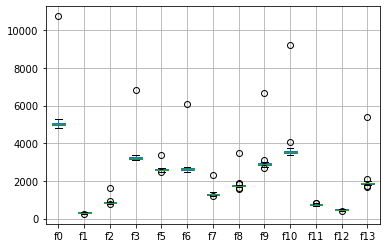

In [14]:
boxplot = df.boxplot(column=['f0', 'f1', 'f2','f3', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12','f13'])
boxplot

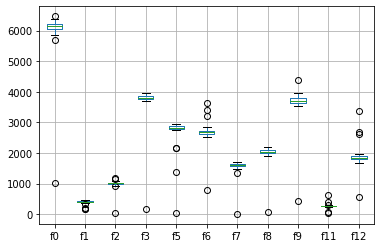

In [10]:
boxplot = df.boxplot(column=['f0', 'f1', 'f2','f3', 'f5', 'f6', 'f7', 'f8', 'f9', 'f11', 'f12'])